### DIversidad de Pfams 

In [1]:
library(phyloseq)
library (vegan)
library(ggplot2)

Warning message:
“replacing previous import ‘BiocGenerics::Position’ by ‘ggplot2::Position’ when loading ‘phyloseq’”Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Warning message:
“replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-2


Crear objeto de phyloseq 

In [4]:
pfam_tab<- as.matrix(read.table("mats_abundances.sort.tab", header=T, row.names=1))
pfamOTU=otu_table(pfam_tab, taxa_are_rows=T)
pfam=phyloseq(pfamOTU)
metadata=read.table("sample_data.txt", header=T)
c("1","1","1","2","2","2","3","3","3","4","4","4")->wl_order
cbind(wl_order,metadata)->metadata
data.frame(Sample_ID=metadata$sample_ID, Site=metadata$site, Year=metadata$year, Period=metadata$samp_period, Water_level=metadata$water_level, Season=metadata$season, wl_order=metadata$wl_order, Temperature=metadata$temp,Conductivity=metadata$sp_comd, Sal=metadata$salt, pH=metadata$pH, row.names=sample_names((pfam)))-> o2
sampledata= sample_data(o2)

pfam=phyloseq(pfamOTU, sampledata)
pfam

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10124 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

Estimando índices de diversidad

In [9]:
estimate_richness(pfam)->div_alpha_p
as.data.frame(t(pfam_tab))->sp2
Pielou<-vegan::diversity(sp2)/log(specnumber(sp2))
cbind (div_alpha_p,Pielou)->div_alpha_p
div_alpha_p

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou
S1,6629,7916.856,92.49518,7786.558,44.12164,7.554437,0.9987244,783.9485,1332.195,0.8585359
S2,5167,6108.427,77.14891,5951.651,38.07480,7.564737,0.9988252,851.2295,1194.940,0.8847597
S3,6162,7151.772,80.13313,7034.084,41.61839,7.536980,0.9987023,770.6060,1164.599,0.8637227
S4,7090,8625.982,107.24925,8428.463,45.96354,7.568078,0.9987335,789.6073,1341.744,0.8535644
S5,6695,7978.183,94.12588,7803.488,44.01618,7.564408,0.9987472,798.1962,1296.143,0.8587023
S6,6123,7298.951,92.23206,7080.825,41.78794,7.485337,0.9986792,757.1067,1167.858,0.8584292
S7,7014,8649.187,114.58063,8350.412,45.63128,7.542102,0.9986914,764.1924,1315.046,0.8516699
S8,6378,7532.949,92.09878,7286.888,42.15693,7.491470,0.9986547,743.3185,1146.695,0.8551311
S9,6782,7972.291,89.60556,7793.669,43.75053,7.489023,0.9985754,701.9396,1241.477,0.8489004
S10,6399,7538.322,86.32907,7425.114,42.94990,7.517991,0.9986962,767.0120,1234.050,0.8578366


In [11]:
write.table(div_alpha_p, "diversidad_pfam.txt", sep="\t")

In [19]:
cbind (div_alpha_p, Pielou, metadata)->div_alpha_p
library(ggplot2)
div_alpha_p$season <- factor(div_alpha_p$season_year, levels = div_alpha_p$season_year[order(div_alpha_p$wl_order)])
div_alpha_p$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
Levels: Autumn_12 Autumn_13 Spring_13 Spring_14

In [26]:
ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "bottom")->p1
ggplot(div_alpha_p, aes(x=season_year, y=Pielou, group=site))+geom_point(aes(x=season_year, y=Pielou, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ theme (legend.position = "bottom")->p2

png 
  2

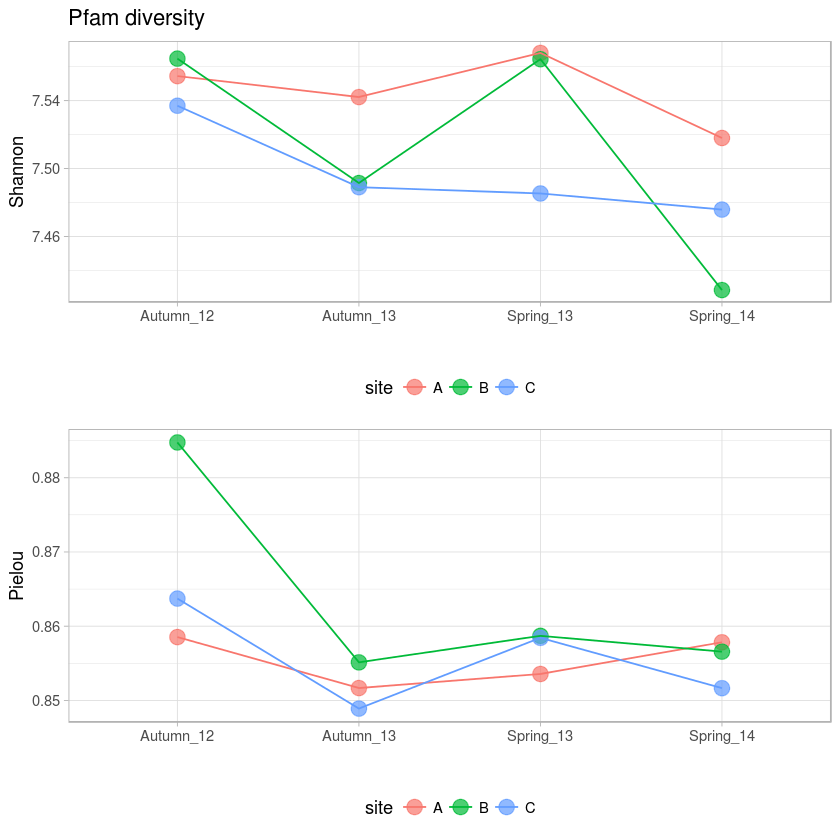

In [27]:
theme_set(theme_light())
pdf("alpha_div_plot.pdf")
multiplot (p1, p2, cols=1)
dev.off()
multiplot (p1, p2, cols=1)